### Step 1: Import Necessary Libraries
In this step, we import all necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Required Libraries

# Libraries required for Loading the data and for EDA
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import scipy.stats as st

# Import the preprocessing module
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Libraries required for Modelling 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import tree, model_selection
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *

# Libraries required for scoring
from pycaret.classification import plot_model
from pycaret.classification import evaluate_model
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

### Step 2: Read the dataset.csv data from the Resources folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('Resources/dataset.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail to see if 'loan_status' have both 0's and 1's)
display(df.head())
display(df.tail())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


### Step 3: Perform Exploratory Data Analysis (EDA)

This step includes generating descriptive statistics, visualizing the data, checking for multicollinearity etc.

In [4]:
# Generating descriptive statistics
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [5]:
# Checking the data types for each features
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [6]:
# Determine the number of unique values in each column.
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [7]:
# Check the category for 'Targets'
type_counts = df['Target'].value_counts()
type_counts

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

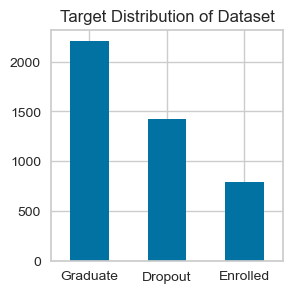

In [8]:
# Visualize the 'Target' data
df["Target"].value_counts().plot(kind="bar", figsize=(3,3), title="Target Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()

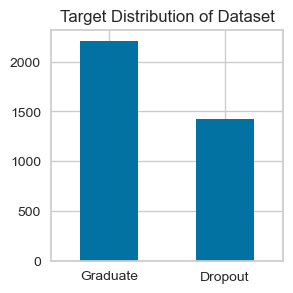

In [9]:
# As we want to predict about academic success 'ENROLLED' category is of no use, so drop this value
df = df[df.Target != "Enrolled"]
df["Target"].value_counts().plot(kind="bar", figsize=(3,3), title="Target Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [11]:
# Convert 'Graduate' to 1, and 'Dropout' to 0
df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


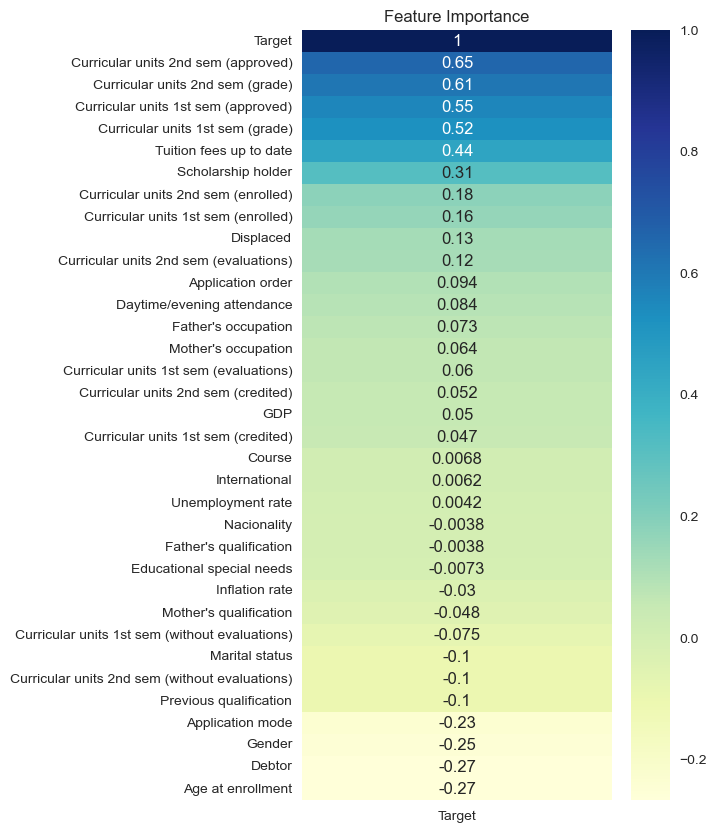

In [12]:
# Checking the correlatoon between each features with'Target'
plt.figure(figsize=(5, 10))
correlation = df.corr()
target_correlation = correlation[['Target']].sort_values(by='Target', ascending=False)
sns.heatmap(target_correlation, cmap='YlGnBu', annot=True)
plt.title('Feature Importance')
plt.show()

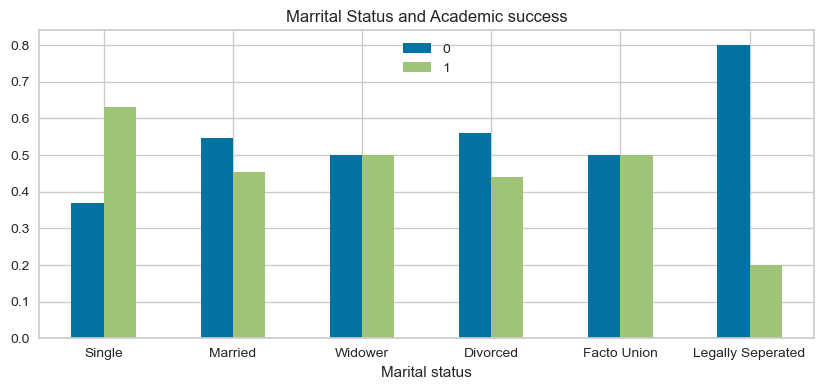

In [13]:
# Marrital Status affecting Academic Progress of student, 'Graduate' to 1, and 'Dropout' to 0
# Based on this I will use these data with correlation with -0.1 (and below) and won't be using ones that has 0.0...

pd.crosstab(df["Marital status"], df["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()

In [14]:
unique_targets = df['Target'].unique()
print(unique_targets)

[0 1]


In [15]:
# Subset the data for only the "Graduate" category
graduate_data = df[df['Target'] == 1]  # Filter rows where Target is "Graduate"
sorted_data = graduate_data.sort_values(['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)'], ascending=True)

# Print the sorted table
sorted_data[['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Target']]

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Target
20,0.000000,0.000000,1
66,0.000000,0.000000,1
101,0.000000,0.000000,1
405,0.000000,0.000000,1
527,0.000000,0.000000,1
...,...,...,...
2169,17.166667,15.571429,1
139,17.587500,17.125000,1
1293,17.600000,14.800000,1
2443,17.692308,18.875000,1


In the given dataset, it is evident that individuals who received a grade of '0' for both semesters are unable to graduate. Hence, we will exclude such cases from further analysis. Additionally, considering the grade distribution where the scores increment from 0 to 10 and gradually increase up to 18.57, we will assume that a grade over 10 is considered a passing mark

In [16]:
# Exclude rows where the specified conditions are met
filtered_data = df[(df['Curricular units 2nd sem (grade)'] != 0) & 
                   (df['Curricular units 1st sem (grade)'] != 0) & 
                   (df['Target'] != '1')]

# Create a new DataFrame without the excluded rows
new_df = pd.DataFrame(filtered_data)

# Print the new DataFrame
new_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,12,1,17,0,12,1,22,27,10,8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,12,1,1,1,13,28,8,11,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
8,1,1,3,10,1,1,15,1,1,10,10,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,10,1,1,1,1,14,5,8,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,0
10,1,1,1,14,1,1,1,23,14,6,8,1,0,0,1,0,0,18,0,0,6,6,6,12.333333,0,0,6,7,5,14.200000,0,13.9,-0.3,0.79,1
11,1,1,1,12,1,1,1,13,28,10,10,1,0,0,1,0,1,18,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,1
13,1,17,1,11,1,16,1,1,1,5,8,1,0,0,1,0,1,21,0,0,6,7,6,10.571429,0,0,6,8,5,11.000000,0,8.9,1.4,3.51,1


In [17]:
# Saving dataset for later use 
new_df.to_csv('Resources/reduced_data.csv',header=True,index = False)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 1 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  2802 non-null   int64  
 1   Application mode                                2802 non-null   int64  
 2   Application order                               2802 non-null   int64  
 3   Course                                          2802 non-null   int64  
 4   Daytime/evening attendance                      2802 non-null   int64  
 5   Previous qualification                          2802 non-null   int64  
 6   Nacionality                                     2802 non-null   int64  
 7   Mother's qualification                          2802 non-null   int64  
 8   Father's qualification                          2802 non-null   int64  
 9   Mother's occupation                      

Deciding what columns to keep based on my undestanding and the correlation. ALso to take off some features so there's less  'noise' within the dataset. 

* Tuition fees up to date - 1—yes, 0—no
* Scholarship holder - 1—yes, 0—no
* Daytime/evening attendance - 1—daytime, 0—evening
* Gender - 1—male, 0—female
* Previous qualification - 
    * 1—Secondary education,
    * 2—Higher education—bachelor’s degree,
    * 3—Higher education—degree,
    * 4—Higher education—master’s degree,
    * 5—Higher education—doctorate,
    * 6—Frequency of higher education,
    * 7—12th year of schooling—not completed,
    * 8—11th year of schooling—not completed,
    * 9—Other—11th year of schooling
    * 10—10th year of schooling
    * 11—10th year of schooling—not completed
    * 12—Basic education 3rd cycle (9th/10th/11th year) or equivalent
    * 13—Basic education 2nd cycle (6th/7th/8th year) or equivalent
    * 14—Technological specialization course
    * 15—Higher education—degree (1st cycle)
    * 16—Professional higher technical course
    * 17—Higher education—master’s degree (2nd cycle)

* Marital status -
    * 1—Single,
    * 2—Married,
    * 3—Widower,
    * 4—Divorced,
    * 5—Facto union,
    * 6—Legally separated,
* Curricular units 1st sem (grade) - values between 0 - 20, assuming anything below 10 is a fail
* Curricular units 2nd sem (grade) - values between 0 - 20, assuming anything below 10 is a fail
* Target - 1-Graduate, 0-Dropout
* Age at enrollment - between 17 - 70, Age Group - ['17-24', '25-34', '35-44', '45-54', '55-64', '65+'] = [1, 2, 3, 4, 5, 6] 

In [19]:
# Bin the values for 'Age at enrollment'
age_bins = [17, 24, 34, 44, 54, 64, 70] 
age_labels = [1, 2, 3, 4, 5, 6] 
new_df['Age Group'] = pd.cut(df['Age at enrollment'], bins=age_bins, labels=age_labels)

# Create a new DataFrame for the 'binned' values 
bin_df = new_df.copy()  
bin_df['Age at enrollment'] = new_df['Age Group']  
bin_df = bin_df.drop('Age at enrollment', axis=1)

bin_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Age Group
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1,4
5,2,12,1,17,0,12,1,22,27,10,8,0,0,1,1,1,0,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1,4
6,1,1,1,12,1,1,1,13,28,8,11,1,0,0,1,0,1,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1,1
8,1,1,3,10,1,1,15,1,1,10,10,0,0,0,1,0,1,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1,1
9,1,1,1,10,1,1,1,1,14,5,8,1,0,1,0,0,0,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,0,1
10,1,1,1,14,1,1,1,23,14,6,8,1,0,0,1,0,0,0,0,6,6,6,12.333333,0,0,6,7,5,14.200000,0,13.9,-0.3,0.79,1,1
11,1,1,1,12,1,1,1,13,28,10,10,1,0,0,1,0,1,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,1,1
13,1,17,1,11,1,16,1,1,1,5,8,1,0,0,1,0,1,0,0,6,7,6,10.571429,0,0,6,8,5,11.000000,0,8.9,1.4,3.51,1,1


In [20]:
# Creating a new dataframe using the choosen columns
clean_df = bin_df[["Marital status","Previous qualification","Tuition fees up to date","Gender","Scholarship holder","Age Group","Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)","Target"]]

display(clean_df.head())
display(clean_df.tail())

,Marital status,Previous qualification,Tuition fees up to date,Gender,Scholarship holder,Age Group,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
1,1,1,0,1,0,1,14.000000,13.666667,1
3,1,1,1,0,0,1,13.428571,12.400000,1
4,2,1,1,0,0,4,12.333333,13.000000,1
5,2,12,1,1,0,4,11.857143,11.500000,1
6,1,1,1,0,1,1,13.300000,14.345000,1


,Marital status,Previous qualification,Tuition fees up to date,Gender,Scholarship holder,Age Group,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
4419,1,1,1,1,0,1,13.600000,12.666667,1
4420,1,1,0,0,0,1,12.000000,11.000000,0
4421,1,1,1,0,1,2,14.912500,13.500000,0
4422,1,1,1,0,1,1,13.800000,12.000000,1
4423,1,1,1,0,0,1,11.666667,13.000000,1


In [21]:
# Select the categorical columns for one-hot encoding, this is to make sure that the machine learning algorithm sees these values as categorical values rather than numerical values.
categorical_cols = ['Marital status', 'Previous qualification', 'Age Group']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(clean_df, columns=categorical_cols)

# Display the encoded DataFrame
df_encoded.head()

,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_6,Previous qualification_7,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6
1,0,1,0,14.000000,13.666667,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,13.428571,12.400000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,12.333333,13.000000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,1,0,11.857143,11.500000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,0,1,13.300000,14.345000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [94]:
# Saving dataset for later use 
df_encoded.to_csv('Resources/encoded_data.csv',header=True,index = False)

In [22]:
# Check how many rows and cloumns within df_encoded
df_encoded.shape

(2802, 34)

### Step 4: Setup PyCaret
PyCaret's setup function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

setup() must be called before executing any other function in pycaret.

It takes two mandatory parameters: a pandas DataFrame and the name of the target column.

All other parameters are optional and are used to customize the preprocessing pipeline.

In [23]:
clf = setup(data = df_encoded, target = 'Target', fix_imbalance = True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(2802, 34)"
4,Transformed data shape,"(3825, 34)"
5,Transformed train set shape,"(2984, 34)"
6,Transformed test set shape,"(841, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


### Step 5: Compare Models

In this step, PyCaret's compare_models function trains all the models in the model library using default hyperparameters and evaluates performance metrics using cross-validation.

The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC across the folds (10 by default) of all the available models in the model library.

In [24]:
# Best model - this trains a whole selectiom of machine learning algorithm to be able to predict our feature column
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.8348,0.8699,0.8936,0.8811,0.5215,0.5245,0.4070
ada,Ada Boost Classifier,0.8169,0.8306,0.8599,0.8960,0.8771,0.5172,0.5207,0.3460
lightgbm,Light Gradient Boosting Machine,0.8052,0.8055,0.8660,0.8773,0.8711,0.4707,0.4732,0.4830
rf,Random Forest Classifier,0.7986,0.7980,0.8566,0.8764,0.8660,0.4592,0.4610,0.4740
et,Extra Trees Classifier,0.7884,0.7758,0.8499,0.8697,0.8591,0.4320,0.4344,0.4690
ridge,Ridge Classifier,0.7879,0.0000,0.8063,0.9052,0.8522,0.4790,0.4907,0.3010
lda,Linear Discriminant Analysis,0.7843,0.8311,0.8016,0.9048,0.8493,0.4727,0.4853,0.3510
lr,Logistic Regression,0.7797,0.8347,0.7942,0.9055,0.8453,0.4662,0.4805,1.1270
dt,Decision Tree Classifier,0.7588,0.7131,0.8009,0.8722,0.8347,0.3904,0.3964,0.3770
svm,SVM - Linear Kernel,0.7419,0.0000,0.7594,0.8920,0.8048,0.4046,0.4319,0.3330


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

### Step 6: Model Tuning

Once the best model from the compare_models function is selected, the tune_model function is used for hyperparameter tuning. 

This function automatically tunes the hyperparameters of a model on a preprocessed dataset. 

The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold.

In [25]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8426,0.8327,0.9067,0.8889,0.8977,0.5572,0.5577
1,0.8622,0.8624,0.9000,0.9184,0.9091,0.6250,0.6255
2,0.8112,0.8724,0.8322,0.9118,0.8702,0.5270,0.5344
3,0.7755,0.8351,0.7919,0.9008,0.8429,0.4556,0.4674
4,0.8061,0.8141,0.8792,0.8675,0.8733,0.4604,0.4606
5,0.8571,0.9038,0.8658,0.9416,0.9021,0.6397,0.6474
6,0.8214,0.8381,0.8523,0.9071,0.8789,0.5403,0.5442
7,0.8316,0.8200,0.9195,0.8671,0.8925,0.5058,0.5105
8,0.7908,0.7839,0.8523,0.8699,0.8610,0.4385,0.4389


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
# Print type of the model
print(type(tuned_model))

# Print the model
print(tuned_model)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Step 7: Evaluate the Model

The evaluate_model function displays a user interface for all available plots for a given estimator. 

It uses the yellowbrick machine learning visualization library to power its visualizations. 

You can select the plot you need from the drop-down menu.

In [28]:
# Best Model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Step 8: Make Predictions

The predict_model function is used to predict the label and score of the test data. 

It takes a trained model object and a dataset and generates predictions. 

In [29]:
# Best model
predictions = predict_model(tuned_model)
pd.set_option('display.max_columns', None)
display(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8228,0.8389,0.8781,0.8878,0.8830,0.5187,0.5188


,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_6,Previous qualification_7,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6,Target,prediction_label,prediction_score
2863,1,0,0,12.333333,12.105263,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.6222
939,0,0,0,11.400000,11.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.9773
2189,1,1,0,12.200000,12.333333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.5118
3443,1,0,0,13.833333,12.666667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.8290
1284,1,1,1,11.000000,11.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.6732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,1,0,12.000000,10.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.9142
103,1,0,0,14.631579,14.230769,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.9742
607,1,0,1,12.355714,12.355714,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.7830
445,1,0,1,13.000000,14.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.9316


### Step 9: Finalize and Save Model

The model is finalized using the finalize_model() function. 

This function fits the model onto the complete dataset including the test data. 

The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [30]:
# Best model
final_model = finalize_model(tuned_model)
# We can save the model using PyCaret's save_model() function.
save_model(best_model, model_name='gbc') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\hamim\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Tuition fees up to date',
                                              'Gender', 'Scholarship holder',
                                              'Curricular units 1st sem (grade)',
                                              'Curricular units 2nd sem (grade)',
                                              'Marital status_1',
                                              'Marital status_2',
                                              'Marital status_3',
                                              'Marital status_4',
                                              'Marital status_5',...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='deviance',
                   

### Step 10: Testing the Model on Unseen Data

In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 1 to 4423
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tuition fees up to date           2802 non-null   int64  
 1   Gender                            2802 non-null   int64  
 2   Scholarship holder                2802 non-null   int64  
 3   Curricular units 1st sem (grade)  2802 non-null   float64
 4   Curricular units 2nd sem (grade)  2802 non-null   float64
 5   Target                            2802 non-null   int64  
 6   Marital status_1                  2802 non-null   uint8  
 7   Marital status_2                  2802 non-null   uint8  
 8   Marital status_3                  2802 non-null   uint8  
 9   Marital status_4                  2802 non-null   uint8  
 10  Marital status_5                  2802 non-null   uint8  
 11  Marital status_6                  2802 non-null   uint8  
 12  Previo

* Tuition fees up to date - 1—yes, 0—no
* Scholarship holder - 1—yes, 0—no
* Daytime/evening attendance - 1—daytime, 0—evening
* Gender - 1—male, 0—female
* Previous qualification - 
    * 1—Secondary education,
    * 2—Higher education—bachelor’s degree,
    * 3—Higher education—degree,
    * 4—Higher education—master’s degree,
    * 5—Higher education—doctorate,
    * 6—Frequency of higher education,
    * 7—12th year of schooling—not completed,
    * 8—11th year of schooling—not completed,
    * 9—Other—11th year of schooling
    * 10—10th year of schooling
    * 11—10th year of schooling—not completed
    * 12—Basic education 3rd cycle (9th/10th/11th year) or equivalent
    * 13—Basic education 2nd cycle (6th/7th/8th year) or equivalent
    * 14—Technological specialization course
    * 15—Higher education—degree (1st cycle)
    * 16—Professional higher technical course
    * 17—Higher education—master’s degree (2nd cycle)

* Marital status -
    * 1—Single,
    * 2—Married,
    * 3—Widower,
    * 4—Divorced,
    * 5—Facto union,
    * 6—Legally separated,
* Curricular units 1st sem (grade) - values between 0 - 20, assuming anything below 10 is a fail
* Curricular units 2nd sem (grade) - values between 0 - 20, assuming anything below 10 is a fail
* Target - 1-Graduate, 0-Dropout
* Age at enrollment - between 17 - 70, Age Group - ['17-24', '25-34', '35-44', '45-54', '55-64', '65+'] = [1, 2, 3, 4, 5, 6] 

In [32]:
# Load the saved model
loaded_model = load_model('gbc')

# Create a sample dataframe with new data
new_data = pd.DataFrame({
    'Tuition fees up to date': [1],
    'Gender': [1],
    'Curricular units 1st sem (grade)': [13.833333],
    'Curricular units 2nd sem (grade)': [12.666667],
    'Scholarship holder': [1],
    'Target': [1],
    'Marital status_1': [1],
    'Marital status_2' : [0],
    'Marital status_3' : [0],
    'Marital status_4' : [0],
    'Marital status_5' : [0],
    'Marital status_6' : [0],
    'Previous qualification_1': [1],
    'Previous qualification_2': [0],
    'Previous qualification_3': [0],
    'Previous qualification_4': [0],
    'Previous qualification_5': [0],
    'Previous qualification_6': [0],
    'Previous qualification_7': [0],
    'Previous qualification_8': [0],
    'Previous qualification_9': [0],
    'Previous qualification_10': [0],
    'Previous qualification_11': [0],
    'Previous qualification_12': [0],
    'Previous qualification_13': [0],
    'Previous qualification_14': [0],
    'Previous qualification_15': [0],
    'Previous qualification_16': [0],
    'Previous qualification_17': [0],
    'Age Group_1': [1],
    'Age Group_2': [0],
    'Age Group_3': [0],
    'Age Group_4': [0],
    'Age Group_5': [0],
    'Age Group_6': [0]
})

# Use the loaded model to make predictions on the new data
predictions = predict_model(loaded_model, data=new_data)

# View the predictions
print(predictions['Target'])
display(predictions)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


0    1
Name: Target, dtype: int8


,Tuition fees up to date,Gender,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Scholarship holder,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_7,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6,Target,prediction_label,prediction_score
0,1,1,13.833333,12.666667,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.7422


In [39]:
# Set random seed for reproducibility
np.random.seed(4)

# Number of rows
num_rows = 100

# Create a dictionary to store the column values
data = {
    'Tuition fees up to date': np.random.choice([0, 1], size=num_rows),
    'Gender': np.random.choice([0, 1], size=num_rows),
    'Scholarship holder': np.random.choice([0, 1], size=num_rows),
    'Target': np.random.choice([0, 1], size=num_rows),
}

# Generate random values for 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)'
data['Curricular units 1st sem (grade)'] = [np.random.choice([0.0, np.random.uniform(10.0, 18.0)]) for _ in range(num_rows)]
data['Curricular units 2nd sem (grade)'] = [np.random.choice([0.0, np.random.uniform(10.0, 18.0)]) for _ in range(num_rows)]

# Add columns for marital status
marital_status_columns = ['Marital status_1', 'Marital status_2', 'Marital status_3', 'Marital status_4',
                          'Marital status_5', 'Marital status_6']
data.update({column: [1 if i == np.random.randint(0, len(marital_status_columns)) else 0 for i in range(num_rows)]
             for column in marital_status_columns})

# Add columns for previous qualification
previous_qualification_columns = ['Previous qualification_1', 'Previous qualification_2', 'Previous qualification_3',
                                  'Previous qualification_4', 'Previous qualification_5', 'Previous qualification_6',
                                  'Previous qualification_7', 'Previous qualification_8', 'Previous qualification_9',
                                  'Previous qualification_10', 'Previous qualification_11', 'Previous qualification_12',
                                  'Previous qualification_13', 'Previous qualification_14', 'Previous qualification_15',
                                  'Previous qualification_16', 'Previous qualification_17']
data.update({column: [1 if i == np.random.randint(0, len(previous_qualification_columns)) else 0 for i in range(num_rows)]
             for column in previous_qualification_columns})

# Add columns for age group
age_group_columns = ['Age Group_1', 'Age Group_2', 'Age Group_3', 'Age Group_4', 'Age Group_5', 'Age Group_6']
data.update({column: [1 if i == np.random.randint(0, len(age_group_columns)) else 0 for i in range(num_rows)]
             for column in age_group_columns})

# Create the DataFrame
unseen_df = pd.DataFrame(data)


In [40]:
unseen_df

,Tuition fees up to date,Gender,Scholarship holder,Target,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_7,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6
0,0,1,0,0,11.845968,15.192062,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,1,1,12.281957,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,12.713799,10.591860,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
3,1,1,0,1,0.000000,12.332350,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,10.985823,17.860095,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,10.460651,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,1,1,0,0,17.640528,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,1,0,0,1,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Load the saved model
loaded_model = load_model('gbc')
# Use the loaded model to make predictions on the new data
predictions = predict_model(loaded_model, data=unseen_df)

# View the predictions
print(predictions['Target'])
display(predictions)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.4300,0.4752,0.1897,0.5238,0.2785,-0.0432,-0.0587


0     0
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    1
99    0
Name: Target, Length: 100, dtype: int8


,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_7,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6,Target,prediction_label,prediction_score
0,0,1,0,11.845967,15.192061,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.8412
1,0,1,1,12.281957,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.9099
2,1,0,1,12.713799,10.591860,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0.5454
3,1,1,0,0.000000,12.332350,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.9531
4,1,1,0,10.985823,17.860094,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.7092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,10.460650,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9156
96,1,1,0,17.640528,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.7540
97,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9849
98,1,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.9475


### Analysis of Machine Learning Algoritm against Ramdomly Generated Data

There could be several reasons why the performance of the model generated with random data is significantly lower than the model trained with real data:

1. Lack of meaningful patterns: Randomly generated data may not contain the same patterns and relationships present in real data. Real data often exhibits specific patterns, correlations, and dependencies that machine learning models can learn from. If the random data lacks these meaningful patterns, it can lead to poor model performance.

2. Insufficient sample size: The amount of training data available plays a crucial role in the performance of machine learning models. If the randomly generated data has a smaller sample size compared to the real data used for training, the model may not have enough information to generalize well and achieve high accuracy.

3. Inadequate representation of the data distribution: Real data often follows specific distributions, such as normal distribution, skewed distribution, or multimodal distribution. If the randomly generated data does not accurately represent the distribution of the real data, the model may struggle to capture the underlying patterns and make accurate predictions.

### Step 11: Optimising the Model's Performance

#### Optimisation 1 - Binning (81.9%, less than model 1 = 82%

Binning continuous variables can be useful in certain scenarios. It can help simplify the relationship between variables and the target variable by grouping similar values into bins. This can reduce the complexity of the model and make it more robust to noise or fluctuations in the data, potentially leading to improved accuracy. The feature that will be binned is:

1. Previous qualification

For Previous qualification:

1 - Secondary Education:
*  1 - Secondary education
* 10 — 10th year of schooling
* 12 — Basic education 3rd cycle (9th/10th/11th year) or equivalent
* 13 — Basic education 2nd cycle (6th/7th/8th year) or equivalent
    
2 - Undergraduate Education:
* 2 - Higher education—bachelor’s degree
* 3 - Higher education—degree
* 6 - Frequency of higher education
* 15 - Higher education—degree (1st cycle)
    
3 - Postgraduate Education:    
* 4 - Higher education—master’s degree
* 5 - Higher education—doctorate
* 17 - Higher education—master’s degree (2nd cycle)
    
4 - Incomplete Education:
* 7 — 12th year of schooling—not completed
* 8 — 11th year of schooling—not completed
* 11 — 10th year of schooling—not completed
    
5 - Other Education:
* 9 — Other—11th year of schooling
* 14 — Technological specialization course
* 16 — Professional higher technical course

In [66]:
clean_df2 = clean_df.copy()

# Define the binning function for Previous qualification
def bin_previous_qualification(value):
    if value in [1, 10, 12, 13]:
        return 1  # Secondary Education
    elif value in [2, 3, 6, 15]:
        return 2  # Undergraduate Education
    elif value in [4, 5, 17]:
        return 3  # Postgraduate Education
    elif value in [7, 8, 11]:
        return 4  # Incomplete Education
    elif value in [9, 14, 16]:
        return 5  # Other Education
    else:
        return np.nan

# Apply binning to 'Previous qualification' column
clean_df2['Previous qualification'] = clean_df['Previous qualification'].apply(bin_previous_qualification)


In [67]:
clean_df2

,Marital status,Previous qualification,Tuition fees up to date,Gender,Scholarship holder,Age Group,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
1,1,1,0,1,0,1,14.000000,13.666667,1
3,1,1,1,0,0,1,13.428571,12.400000,1
4,2,1,1,0,0,4,12.333333,13.000000,1
5,2,1,1,1,0,4,11.857143,11.500000,1
6,1,1,1,0,1,1,13.300000,14.345000,1
...,...,...,...,...,...,...,...,...,...
4419,1,1,1,1,0,1,13.600000,12.666667,1
4420,1,1,0,0,0,1,12.000000,11.000000,0
4421,1,1,1,0,1,2,14.912500,13.500000,0
4422,1,1,1,0,1,1,13.800000,12.000000,1


In [71]:
# Select the categorical columns for one-hot encoding, this is to make sure that the machine learning algorithm sees these values as categorical values rather than numerical values.
categorical_cols = ['Marital status', 'Previous qualification', 'Age Group']

# Apply one-hot encoding to the categorical columns
df_encoded2 = pd.get_dummies(clean_df2, columns=categorical_cols)

# Display the encoded DataFrame
df_encoded2.head()

,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,...,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6
1,0,1,0,14.000000,13.666667,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,13.428571,12.400000,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,12.333333,13.000000,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1,0,11.857143,11.500000,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1,0,1,13.300000,14.345000,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
# Check how many rows and cloumns within df_encoded
df_encoded2.shape

(2802, 23)

In [74]:
clf2 = setup(data = df_encoded2, target = 'Target', fix_imbalance = True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(2802, 23)"
4,Transformed data shape,"(3825, 23)"
5,Transformed train set shape,"(2984, 23)"
6,Transformed test set shape,"(841, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [75]:
# Best model2 - this trains a whole selectiom of machine learning algorithm to be able to predict our feature column
best_model2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8225,0.8293,0.8733,0.8922,0.8821,0.5215,0.5247,0.6720
ada,Ada Boost Classifier,0.8144,0.8316,0.8586,0.8938,0.8754,0.5110,0.5141,0.5080
lightgbm,Light Gradient Boosting Machine,0.8118,0.7964,0.8733,0.8794,0.8759,0.4851,0.4872,0.7490
rf,Random Forest Classifier,0.7925,0.8003,0.8465,0.8774,0.8613,0.4483,0.4512,0.6690
svm,SVM - Linear Kernel,0.7863,0.0000,0.8417,0.8741,0.8545,0.4416,0.4519,0.4670
ridge,Ridge Classifier,0.7843,0.0000,0.7989,0.9074,0.8486,0.4763,0.4903,0.5130
lr,Logistic Regression,0.7802,0.8339,0.7935,0.9067,0.8457,0.4680,0.4821,1.2320
lda,Linear Discriminant Analysis,0.7776,0.8321,0.7935,0.9031,0.8441,0.4603,0.4733,0.4560
et,Extra Trees Classifier,0.7772,0.7782,0.8412,0.8633,0.8517,0.4026,0.4048,0.6040
knn,K Neighbors Classifier,0.7481,0.7680,0.7735,0.8810,0.8235,0.3896,0.4002,0.4780


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [76]:
tuned_model2 = tune_model(best_model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8325,0.8038,0.9067,0.8774,0.8918,0.5215,0.5228
1,0.8265,0.8542,0.8733,0.8973,0.8851,0.5312,0.5320
2,0.8214,0.8615,0.8322,0.9254,0.8763,0.5584,0.5687
3,0.7959,0.8209,0.8322,0.8921,0.8611,0.4782,0.4824
4,0.8061,0.8434,0.8993,0.8535,0.8758,0.4353,0.4384
5,0.8827,0.9030,0.8993,0.9437,0.9210,0.6938,0.6968
6,0.8418,0.8246,0.8926,0.8986,0.8956,0.5693,0.5694
7,0.8112,0.7810,0.8926,0.8636,0.8779,0.4627,0.4639
8,0.7857,0.7904,0.8389,0.8741,0.8562,0.4369,0.4383


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
# Print type of the model
print(type(tuned_model2))

# Print the model
print(tuned_model2)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [82]:
# Best Model2
evaluate_model(tuned_model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [84]:
# Best model2
predictions2 = predict_model(tuned_model2)
pd.set_option('display.max_columns', None)
display(predictions2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8193,0.8433,0.8766,0.8849,0.8807,0.5082,0.5083


,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6,Target,prediction_label,prediction_score
2863,1,0,0,12.333333,12.105263,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0.6359
939,0,0,0,11.400000,11.000000,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.9853
2189,1,1,0,12.200000,12.333333,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.5363
3443,1,0,0,13.833333,12.666667,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0.8238
1284,1,1,1,11.000000,11.500000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0.6790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,1,0,12.000000,10.500000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.9279
103,1,0,0,14.631579,14.230769,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0.9777
607,1,0,1,12.355714,12.355714,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0.6200
445,1,0,1,13.000000,14.166667,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0.9364


#### Optimisation 2 - Identifying Feature Importance and Selecting Relevant Attributes (80%, less than model 1 = 82%)

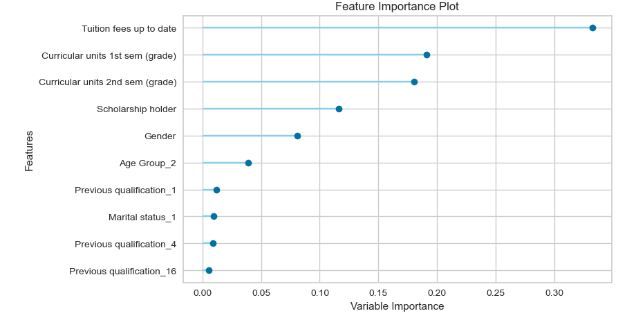

Analysing feature importance helps determine which attributes have the most significant impact on the output. By identifying and selecting the most important attributes, you can reduce the noise and complexity in the model. Focusing on the most relevant features can enhance the model's ability to capture meaningful patterns and improve accuracy. As you can see above, previous qualifications and marital status has very low impact on the prediction so these columns will be removed.

In [85]:
clean_df3 = clean_df.copy()
clean_df3 = clean_df[["Tuition fees up to date","Gender","Scholarship holder","Age Group","Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)","Target"]]
clean_df3

,Tuition fees up to date,Gender,Scholarship holder,Age Group,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
1,0,1,0,1,14.000000,13.666667,1
3,1,0,0,1,13.428571,12.400000,1
4,1,0,0,4,12.333333,13.000000,1
5,1,1,0,4,11.857143,11.500000,1
6,1,0,1,1,13.300000,14.345000,1
...,...,...,...,...,...,...,...
4419,1,1,0,1,13.600000,12.666667,1
4420,0,0,0,1,12.000000,11.000000,0
4421,1,0,1,2,14.912500,13.500000,0
4422,1,0,1,1,13.800000,12.000000,1


In [86]:
# Select the categorical columns for one-hot encoding, this is to make sure that the machine learning algorithm sees these values as categorical values rather than numerical values.
categorical_cols = ['Age Group']

# Apply one-hot encoding to the categorical columns
df_encoded3 = pd.get_dummies(clean_df3, columns=categorical_cols)

# Display the encoded DataFrame
df_encoded3.head()

,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6
1,0,1,0,14.000000,13.666667,1,1,0,0,0,0,0
3,1,0,0,13.428571,12.400000,1,1,0,0,0,0,0
4,1,0,0,12.333333,13.000000,1,0,0,0,1,0,0
5,1,1,0,11.857143,11.500000,1,0,0,0,1,0,0
6,1,0,1,13.300000,14.345000,1,1,0,0,0,0,0


In [87]:
# Check how many rows and cloumns within df_encoded
df_encoded3.shape

(2802, 12)

In [88]:
clf3 = setup(data = df_encoded3, target = 'Target', fix_imbalance = True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(2802, 12)"
4,Transformed data shape,"(3825, 12)"
5,Transformed train set shape,"(2984, 12)"
6,Transformed test set shape,"(841, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [89]:
# Best model3 - this trains a whole selectiom of machine learning algorithm to be able to predict our feature column
best_model3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8179,0.8250,0.8652,0.8931,0.8783,0.5150,0.5186,0.5900
ada,Ada Boost Classifier,0.8103,0.8302,0.8452,0.9004,0.8714,0.5099,0.5155,0.6250
lightgbm,Light Gradient Boosting Machine,0.7899,0.7903,0.8411,0.8780,0.8588,0.4479,0.4507,0.7160
rf,Random Forest Classifier,0.7858,0.7923,0.8378,0.8757,0.8560,0.4379,0.4405,0.6780
nb,Naive Bayes,0.7817,0.8102,0.8418,0.8678,0.8544,0.4182,0.4199,0.5350
lda,Linear Discriminant Analysis,0.7807,0.8342,0.7955,0.9054,0.8462,0.4680,0.4814,0.5440
ridge,Ridge Classifier,0.7777,0.0000,0.7915,0.9051,0.8441,0.4615,0.4754,0.5080
et,Extra Trees Classifier,0.7767,0.7660,0.8358,0.8663,0.8505,0.4085,0.4104,0.6930
lr,Logistic Regression,0.7710,0.8343,0.7835,0.9032,0.8384,0.4507,0.4655,1.2450
svm,SVM - Linear Kernel,0.7476,0.0000,0.7487,0.9045,0.8148,0.4238,0.4479,0.5160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [90]:
tuned_model3 = tune_model(best_model3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8173,0.7702,0.9000,0.8654,0.8824,0.4740,0.4758
1,0.8316,0.8384,0.8733,0.9034,0.8881,0.5483,0.5496
2,0.8214,0.8583,0.8523,0.9071,0.8789,0.5403,0.5442
3,0.7704,0.8254,0.7987,0.8881,0.8410,0.4323,0.4402
4,0.8112,0.7924,0.8859,0.8684,0.8771,0.4707,0.4711
5,0.8265,0.8880,0.8523,0.9137,0.8819,0.5565,0.5613
6,0.8265,0.8208,0.8725,0.8966,0.8844,0.5377,0.5385
7,0.8214,0.7894,0.9060,0.8654,0.8852,0.4839,0.4865
8,0.7806,0.7643,0.8389,0.8681,0.8532,0.4194,0.4204


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [91]:
# Print type of the model
print(type(tuned_model3))

# Print the model
print(tuned_model3)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [92]:
# Best Model3
evaluate_model(tuned_model3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [93]:
# Best model3
predictions3 = predict_model(tuned_model3)
pd.set_option('display.max_columns', None)
display(predictions3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8074,0.8395,0.8609,0.8830,0.8718,0.4845,0.4852


,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Age Group_6,Target,prediction_label,prediction_score
2863,1,0,0,12.333333,12.105263,0,0,1,0,0,0,1,1,0.5923
939,0,0,0,11.400000,11.000000,0,1,0,0,0,0,0,0,0.9828
2189,1,1,0,12.200000,12.333333,1,0,0,0,0,0,0,1,0.5349
3443,1,0,0,13.833333,12.666667,1,0,0,0,0,0,1,1,0.8127
1284,1,1,1,11.000000,11.500000,1,0,0,0,0,0,1,1,0.7293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,1,0,12.000000,10.500000,1,0,0,0,0,0,0,0,0.9499
103,1,0,0,14.631579,14.230769,0,0,1,0,0,0,1,1,0.9211
607,1,0,1,12.355714,12.355714,1,0,0,0,0,0,1,1,0.5682
445,1,0,1,13.000000,14.166667,1,0,0,0,0,0,1,1,0.9257


### Double checking with Pycaret's logical regression value with logical regression 

In [88]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_encoded['Target']

# Separate the X variable, the features
X = df_encoded.drop(columns=['Target'])

In [89]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
# Add 'stratify=y' so we have an even distribution of 1's and 0's within our model, so we have a representation of all of our data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y,
                                                    test_size = 0.2,
                                                    random_state=1, 
                                                    )

In [90]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# Add 'max_iter = 200', so the model runs this 200 times. This is part of the learning aspect of it
# This gives you an idea on how well the model is predicting
classifier = LogisticRegression(solver='lbfgs',
                                max_iter = 200,
                                random_state=1)

# Fit the model using training data
lr_model = classifier.fit(X_train, y_train)

In [91]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
4248,0,0
902,1,1
4318,1,1
8,1,1
1322,1,1
...,...,...
4261,0,0
342,1,1
2204,1,1
169,1,0


In [92]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.7303121395365095

The pycaret value perfomed better than this hard encoding logistic regression value, but they are within the same ball park. 